In [4]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols, simplify, expand, collect, solve, solveset, sqrt
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
%matplotlib inline

# Занятие 13
# Алгебра
### Задание 1.
Составить матрицу квадратичной формы $7x^2+10\sqrt{3}xy-3y^2−20z^2$, проверить, что она определяет именно заданное уравнение. Найти и вывести на экран собственные числа и собственные векторы матрицы квадратичной формы. 

In [8]:
from sympy.abc import x, y, z
u = 7*x**2 + 10*sqrt(3)*x*y - 3*y**2 - 20*z**2
A = Matrix([[7, 5*sqrt(3), 0], [5*sqrt(3), -3, 0], [0, 0, -20]])
display(A)
X = Matrix([x, y, z])
res = simplify(expand(X.T*A*X))
display(X, res, res[0] - u)

ev = A.eigenvects()
P = Matrix([])
for item in ev:
  degree = item[1]
  print('собственное число', item[0], 'кратность', degree, 'собственный вектор')
  for i in range(degree): # это на случай кратных собственных чисел
    e_i = item[2][i]
    display(e_i)
    P = P.row_join(e_i.normalized()) # нормируем собственные векторы матрицы $A$
display(P)

Matrix([
[        7, 5*sqrt(3),   0],
[5*sqrt(3),        -3,   0],
[        0,         0, -20]])

Matrix([
[x],
[y],
[z]])

Matrix([[7*x**2 + 10*sqrt(3)*x*y - 3*y**2 - 20*z**2]])

0

собственное число -20 кратность 1 собственный вектор


Matrix([
[0],
[0],
[1]])

собственное число -8 кратность 1 собственный вектор


Matrix([
[-sqrt(3)/3],
[         1],
[         0]])

собственное число 12 кратность 1 собственный вектор


Matrix([
[sqrt(3)],
[      1],
[      0]])

Matrix([
[0,      -1/2, sqrt(3)/2],
[0, sqrt(3)/2,       1/2],
[1,         0,         0]])

### Задание 2.
Привести квадратичную форму Примера 1 к каноническому виду с помощью перехода к новому базису из собственных векторов.

In [17]:
A_new = P.T * A * P
display(simplify(A_new))

res = simplify(expand(X.T * A_new*X))
display(res)

Matrix([
[-20,  0,  0],
[  0, -8,  0],
[  0,  0, 12]])

Matrix([[-20*x**2 - 8*y**2 + 12*z**2]])

### Задание 3.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

In [42]:
u2 = 97*x**2 -144*x*y + 97*y**2 + 482*x - 532*y

A3 = Matrix([[97, -72, 241], [-72, 97, -266], [241, -266, -3452]])
X3 = Matrix([x, y, 1])
display(A3, X3)

Matrix([
[ 97,  -72,   241],
[-72,   97,  -266],
[241, -266, -3452]])

Matrix([
[x],
[y],
[1]])

In [43]:
eq3 = Eq(simplify(expand(X3.transpose()*A3*X3))[0], 0)
display(eq3)

Eq(97*x**2 - 144*x*y + 482*x + 97*y**2 - 532*y - 3452, 0)

In [44]:
alpha = sympy.acot((A3[0, 0] - A3[1, 1])/(2*A3[0, 1]))/2
P = Matrix([[Cos(alpha), -Sin(alpha), 0], [Sin(alpha), Cos(alpha), 0], [0, 0, 1]])
display(P)

Matrix([
[sqrt(2)/2, -sqrt(2)/2, 0],
[sqrt(2)/2,  sqrt(2)/2, 0],
[        0,          0, 1]])

In [45]:
A3 = simplify(expand((P.transpose()*A3*P)))
display(A3)

Matrix([
[           25,              0,  -25*sqrt(2)/2],
[            0,            169, -507*sqrt(2)/2],
[-25*sqrt(2)/2, -507*sqrt(2)/2,          -3452]])

In [46]:
from sympy.abc import X, Y, Z
X3 = Matrix((X, Y, 1))
simplify(expand((X3.T*A3*X3)[0]))

25*X**2 - 25*sqrt(2)*X + 169*Y**2 - 507*sqrt(2)*Y - 3452

In [47]:
X3_new = Matrix((X - A3[0, 2]/A3[0, 0], Y - A3[1, 2]/A3[1, 1], 1))
eq3_new = simplify(expand(X3_new.T*A3*X3_new))[0]
display(X3_new, eq3_new)

Matrix([
[  X + sqrt(2)/2],
[Y + 3*sqrt(2)/2],
[              1]])

25*X**2 + 169*Y**2 - 4225

In [49]:
free = eq3_new.subs({X: 0, Y: 0})
eq3_last = eq3_new/(-free) + 1
Eq(eq3_last, 1)

Eq(X**2/169 + Y**2/25, 1)

In [50]:
eq3_last_xy = Eq(eq3_last.subs({X: x, Y: y}), 1)
display(eq3_last_xy)

Eq(x**2/169 + y**2/25, 1)

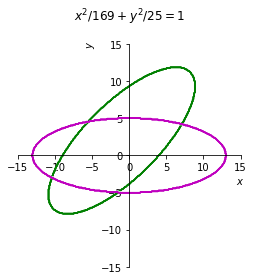

In [54]:
p = plot_implicit(eq3, (x, -15, 15), (y, -15, 15), line_color='g', aspect_ratio=(1, 1), xlabel='$x$', ylabel='$y$',
 title=latex(eq3_last_xy, mode='inline') + '\n', adaptive=False, show=False)
p.extend(plot_implicit(eq3_last_xy, (x, -15, 15), (y, -15, 15), line_color='m', aspect_ratio=(1, 1), adaptive=False, show=False))
p.show()

### Задание 4.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

In [69]:
u3 = x**2 + 2*x*y + y**2 - 4*x + 4*y - 4

A3 = Matrix([[1, 1, -2], [1, 1, 2], [-2, 2, -4]])
X3 = Matrix([x, y, 1])
display(A3, X3)

Matrix([
[ 1, 1, -2],
[ 1, 1,  2],
[-2, 2, -4]])

Matrix([
[x],
[y],
[1]])

In [70]:
eq3 = Eq(simplify(expand(X3.transpose()*A3*X3))[0], 0)
display(eq3)

Eq(x**2 + 2*x*y - 4*x + y**2 + 4*y - 4, 0)

In [71]:
alpha = sympy.acot((A3[0, 0] - A3[1, 1])/(2*A3[0, 1]))/2
P = Matrix([[Cos(alpha), -Sin(alpha), 0], [Sin(alpha), Cos(alpha), 0], [0, 0, 1]])
display(P)

Matrix([
[sqrt(2)/2, -sqrt(2)/2, 0],
[sqrt(2)/2,  sqrt(2)/2, 0],
[        0,          0, 1]])

In [72]:
A3 = simplify(expand((P.transpose()*A3*P)))
display(A3)

Matrix([
[2,         0,         0],
[0,         0, 2*sqrt(2)],
[0, 2*sqrt(2),        -4]])

In [73]:
from sympy.abc import X, Y, Z
X3 = Matrix((X, Y, 1))
simplify(expand((X3.T*A3*X3)[0]))

2*X**2 + 4*sqrt(2)*Y - 4

In [84]:
X3_new = Matrix((X , Y - A3[2, 2]/(2*A3[1, 2]), 1))
eq3_new = simplify(expand(X3_new.T*A3*X3_new))[0]
display(X3_new, eq3_new)

Matrix([
[            X],
[Y + sqrt(2)/2],
[            1]])

2*X**2 + 4*sqrt(2)*Y

In [94]:
#eq3_new = eq3_new.subs({X: x, Y: y})

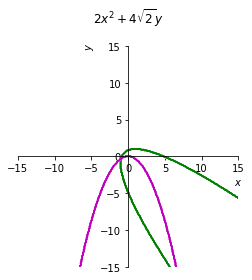

In [106]:
p = plot_implicit(eq3, (x, -15, 15), (y, -15, 15), line_color='g', aspect_ratio=(1, 1), xlabel='$x$', ylabel='$y$', title=latex(eq3_new, mode='inline') + '\n', adaptive=False, show=False)
p.extend(plot_implicit(eq3_new, (x, -15, 15), (y, -15, 15), line_color='m', aspect_ratio=(1, 1), adaptive=False, show=False))
p.show()

###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

# Вариант N 131

$$Q = - 1309 x^{2} + 108 \sqrt{11} x y - 2182 \sqrt{3} x z - 1564 y^{2} - 108 \sqrt{33} y z + 873 z^{2}$$

In [64]:
q = -1309*x**2 + 108*sqrt(11)*x*y - 2182*sqrt(3)*x*z - 1564*y**2 -108*sqrt(33)*y*z + 873*z**2

A5 = Matrix([[-1309, 54*sqrt(11), - 1091*sqrt(3)], [54*sqrt(11), - 1564, -54*sqrt(33)], [- 1091*sqrt(3), -54*sqrt(33), 873]])
display(A5)

X = Matrix([x, y, z])
res = simplify(expand(X.T*A5*X))
display(X, res, res[0] - q)

Matrix([
[        -1309,  54*sqrt(11), -1091*sqrt(3)],
[  54*sqrt(11),        -1564,  -54*sqrt(33)],
[-1091*sqrt(3), -54*sqrt(33),           873]])

Matrix([
[x],
[y],
[z]])

Matrix([[-1309*x**2 + 108*sqrt(11)*x*y - 2182*sqrt(3)*x*z - 1564*y**2 - 108*sqrt(33)*y*z + 873*z**2]])

0

In [65]:
ev = A5.eigenvects()
P = Matrix([])
for item in ev:
  degree = item[1]
  print('собственное число', item[0], 'кратность', degree, 'собственный вектор')
  for i in range(degree): # это на случай кратных собственных чисел
    e_i = item[2][i]
    display(e_i)
    P = P.row_join(e_i.normalized()) # нормируем собственные векторы матрицы $A$
display(P)

собственное число -2400 кратность 1 собственный вектор


Matrix([
[sqrt(3)],
[      0],
[      1]])

собственное число -1600 кратность 1 собственный вектор


Matrix([
[-sqrt(3)/3],
[2*sqrt(33)],
[         1]])

собственное число 2000 кратность 1 собственный вектор


Matrix([
[    -sqrt(3)/3],
[-2*sqrt(33)/99],
[             1]])

Matrix([
[sqrt(3)/2,         -1/20, -3*sqrt(11)/20],
[        0, 3*sqrt(11)/10,          -1/10],
[      1/2,    sqrt(3)/20,  3*sqrt(33)/20]])

In [66]:
A_new = P.T * A5 * P
display(simplify(A_new))

res = simplify(expand(X.T * A_new*X))
display(res)

Matrix([
[-2400,     0,    0],
[    0, -1600,    0],
[    0,     0, 2000]])

Matrix([[-2400*x**2 - 1600*y**2 + 2000*z**2]])